# Análisis de variables para predicción de la generación de una planta solar

## Lecturas de Datos

In [72]:
#Importaciones iniciales
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [73]:
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Estacionaria.xlsx")
datosGeneracion_sel = datosGeneracion.copy()
datosGeneracion_sel = datosGeneracion_sel.drop(columns = ['Fecha', 'DesCondCielo', 'DesDirViento'])

In [74]:
#Normalizamos la información
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(datosGeneracion_sel)
datosGeneracion_scaled = pd.DataFrame(scaled, columns = datosGeneracion_sel.columns, index=datosGeneracion_sel.index)

In [75]:
#Eliminamos los vacíos
datosGeneracion_dropna = datosGeneracion_scaled.dropna()
datosGeneracion_dropna.head(4)

,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,Generacion,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
24,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001263,0.000000,0.0,...,0.500199,0.447368,0.527950,0.500000,0.559045,0.494949,0.444444,0.494208,0.563265,0.507246
25,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001315,0.043478,0.0,...,0.500199,0.473684,0.552795,0.494048,0.584171,0.494949,0.444444,0.494208,0.563265,0.507246
26,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001368,0.086957,0.0,...,0.500199,0.473684,0.534161,0.505952,0.559045,0.494949,0.444444,0.494208,0.563265,0.507246
27,0.0,0.0,0.545455,0.5,0.502778,0.001264,0.033333,0.001420,0.130435,0.0,...,0.500199,0.447368,0.503106,0.500000,0.584171,0.494949,0.444444,0.494208,0.563265,0.492754


## Selección de características

Se usará el PCA para elegir qué variables vamos a utilizar para el ejercicio

In [76]:
y = datosGeneracion_dropna[['Generacion_diff']]
x = datosGeneracion_dropna[['NumSemana', 'NumDiaAnio', 'Hora','Temperatura_diff', 'ProbabilidadLluvia_diff',
                                 'HumedadRelativa_diff', 'VelocidadViento_diff', 'DireccionViento_diff', 'CoberturaNubes',
                                 'IndiceUV_diff', 'CodCondCielo', 'CodDirViento', 'VelocidadRafaga_diff', 'Precipitacion_diff',
                                 'DPT_diff']]

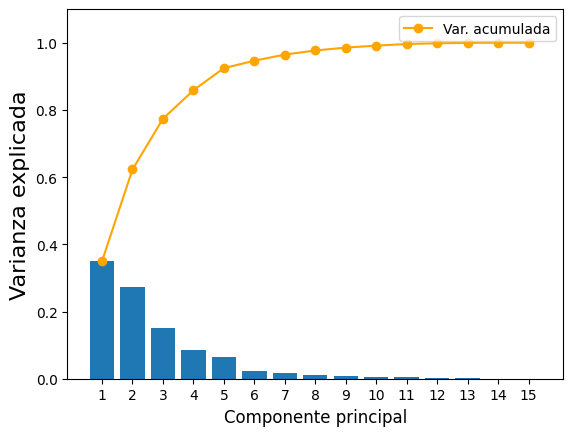

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
datos = pca.fit_transform(x)

plt.figure()
plt.bar(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_)
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, 16),prop_varianza_acum, marker = 'o', c='orange', label='Var. acumulada')
plt.xticks(np.arange(pca.n_components_) + 1)
plt.ylim(0, 1.1)
plt.xlabel('Componente principal', fontsize=12)
plt.ylabel('Varianza explicada', fontsize=16)
plt.legend()
plt.show()

In [8]:
# Coeficientes del PCA
pca_coef = pd.DataFrame(
  data    = pca.components_,
  columns = x.columns,
  index = ['pca1', 'pca2', 'pca3','pca4', 'pca5', 'pca6','pca7', 'pca8', 'pca9','pca10', 'pca11', 'pca12', 'pca13', 'pca14','pca15']
).T.sort_values('pca1', ascending=False)
pca_coef

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
CoberturaNubes,0.611825,0.400882,0.356248,-0.545924,-0.192377,0.034830,0.002226,0.016640,-0.007049,0.005927,0.037767,0.001293,-0.000534,-0.001013,-0.000534
CodCondCielo,0.554651,0.366207,-0.242913,0.606950,0.354691,0.035775,0.021431,-0.051318,-0.018289,0.006491,-0.017024,0.002971,0.000884,0.001668,0.001156
NumSemana,0.360657,-0.588830,0.138139,0.029848,0.085918,-0.016479,0.003087,-0.001832,-0.006273,0.003079,-0.002026,-0.001431,-0.000575,0.006748,0.703893
NumDiaAnio,0.353739,-0.580870,0.152141,0.036609,0.090815,-0.017684,0.006664,-0.004405,-0.006774,-0.001701,-0.001563,-0.000433,-0.000037,-0.006810,-0.710106
HumedadRelativa_diff,0.038502,0.033202,0.016175,0.068162,-0.119754,-0.755157,-0.007789,-0.110334,0.321279,0.176259,0.041728,-0.509418,-0.011004,0.003716,-0.000201
ProbabilidadLluvia_diff,0.020596,0.018788,-0.003719,0.046146,0.032446,-0.177614,-0.128636,0.966870,-0.079673,-0.036795,0.070322,0.000308,-0.021043,0.001796,-0.001482
DPT_diff,0.012751,0.012725,0.008464,0.024291,-0.065161,-0.359617,0.014876,-0.031533,-0.041414,0.564087,-0.177273,0.713620,0.059886,0.007209,-0.001108
VelocidadRafaga_diff,0.003595,0.003424,-0.001593,-0.018811,0.051502,-0.013770,-0.732724,-0.092831,-0.047106,-0.035756,0.015141,-0.017564,0.668352,0.023283,-0.001437
VelocidadViento_diff,0.003474,0.003693,-0.000796,-0.013221,0.036907,-0.027161,-0.656047,-0.113341,-0.059964,0.012438,-0.003293,0.046907,-0.740224,-0.023654,-0.001413
Precipitacion_diff,0.000731,0.000652,-0.000237,0.001939,0.000752,-0.006871,-0.002123,0.001800,0.009981,-0.003736,-0.002979,0.006745,0.033350,-0.999283,0.009613


In [77]:
#Seleccionamos las variables elegidas
x = datosGeneracion_dropna[['NumSemana', 'NumDiaAnio', 'Hora', 'HumedadRelativa_diff', 'CoberturaNubes',
                                 'CodCondCielo', 'CodDirViento']]

## División de datos

Se dividirá la información en un 70-30, donde el 30% está compuesto en los últimos registros, para simular la predicción de pronósticos.

In [83]:
x_train = x.loc[:13245,]
y_train = y.loc[:13245,]

x_test = x.loc[13246:,]
y_test = y.loc[13246:,]

## Selección del mejor modelo

In [14]:
#Importaciones de todos los modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
import xgboost
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [15]:
def fit(x, y, reg_model = 'RF', n_components = 6, n_jobs = None):
    match reg_model:
        case 'AdaBoost':
            model = AdaBoostRegressor()
        case 'Bagging':
            model = BaggingRegressor(n_jobs = n_jobs)
        case 'BayesRidge':
            model = BayesianRidge()
        case 'Boosting':
            model = GradientBoostingRegressor()
        case 'DecisionTree':
            model = DecisionTreeRegressor(max_depth = 2)
        case 'LassoReg':
            model = Lasso(alpha = 0.1)
        case 'LinearReg':
            model = LinearRegression(n_jobs = n_jobs)
        case 'PLS':
            model = PLSRegression(n_components = n_components)
        case 'PCR':
            model = make_pipeline(PCA(n_components = n_components), LinearRegression(n_jobs = n_jobs))
        case 'RidgeReg':
            model = Ridge(alpha = 0.1)
        case 'RF':
            model = RandomForestRegressor(n_jobs = n_jobs)
        case 'XGBoost':
            model = xgboost.XGBRegressor(n_jobs = n_jobs)
    model.fit(x, y)
    return model

In [16]:
#Datos de Entrenamiento
#Procesamos los modelos
from tqdm import tqdm
import multiprocessing
from timeit import default_timer as timer
#Librerías de las métricas
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

models_ed = ['AdaBoost', 'Bagging', 'BayesRidge', 'Boosting', 'DecisionTree', 'LassoReg', 'LinearReg', 
             'PLS', 'PCR', 'RidgeReg', 'RF', 'XGBoost']
n_jobs = multiprocessing.cpu_count()
results_ed = {
        'model' : [],
        'mse' : [],
        'rmse' : [],
        'mae' : [],
        'r2' : [],
        'mape' : [],
        'time' : []
}

for k in tqdm(range(30)):
        for m in models_ed:
                start = timer()
                model = fit(x_train, y_train.Generacion_diff.ravel(), m, n_jobs = n_jobs)
                end = timer()
                y_pred = model.predict(x_test)
                results_ed['model'].append(m)
                results_ed['mse'].append(mse(y_test, y_pred))
                results_ed['rmse'].append(np.sqrt(mse(y_test, y_pred)))
                results_ed['mae'].append(mae(y_test, y_pred))
                results_ed['r2'].append(r2(y_test, y_pred))
                results_ed['mape'].append(mape(y_test, y_pred))
                results_ed['time'].append(end - start)

        df_results_ed = pd.DataFrame(results_ed)
        df_results_ed.to_csv('./Resultados_modelos_articulo.csv')

100%|██████████| 30/30 [05:36<00:00, 11.23s/it]


## Métricas de desempeño

### RMSE

In [22]:
df_results_ed = df_results_ed.replace({'model': 'LassoReg'}, {'model': 'Lasso'})
df_results_ed = df_results_ed.replace({'model': 'AdaBoost'}, {'model': 'Ada Boost'})
df_results_ed = df_results_ed.replace({'model': 'BayesRidge'}, {'model': 'Bayes Ridge'})
df_results_ed = df_results_ed.replace({'model': 'DecisionTree'}, {'model': 'Decision Tree'})
df_results_ed = df_results_ed.replace({'model': 'LinearReg'}, {'model': 'Linear Regression'})
df_results_ed = df_results_ed.replace({'model': 'RidgeReg'}, {'model': 'Ridge'})
df_results_ed = df_results_ed.replace({'model': 'RF'}, {'model': 'Random Forest'})

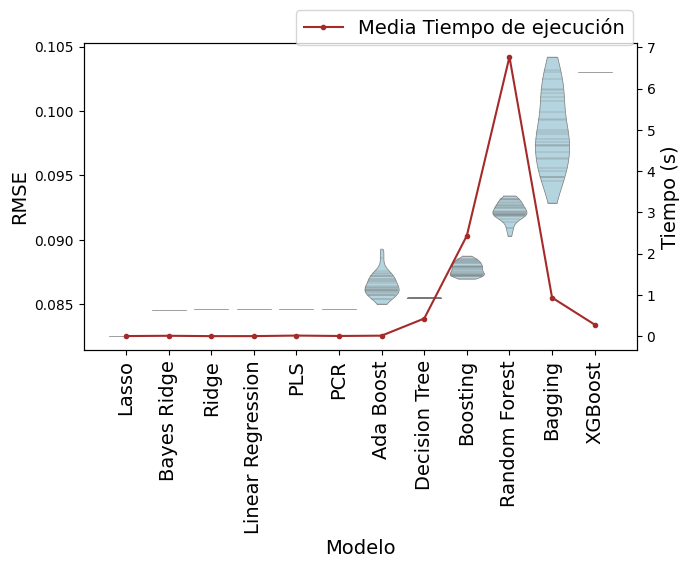

In [29]:
df_results_ed = df_results_ed.sort_values('rmse')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('rmse')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
ax = plt.gca()
sns.violinplot(x="model", y="rmse", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Modelo', fontsize = 14)

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 14)
plt.tight_layout()
plt.show()

### MAE

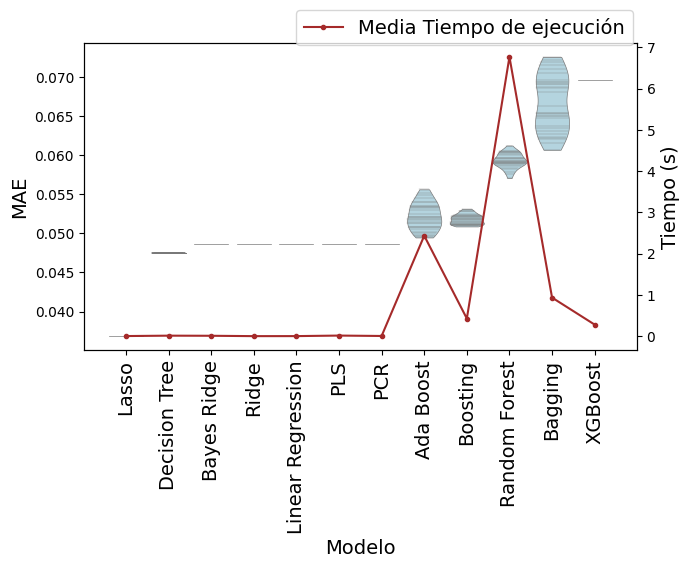

In [30]:
df_results_ed = df_results_ed.sort_values('mae')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mae')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
ax = plt.gca()
sns.violinplot(x="model", y="mae", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Modelo', fontsize = 14)

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 14)
plt.tight_layout()
plt.show()

### R2

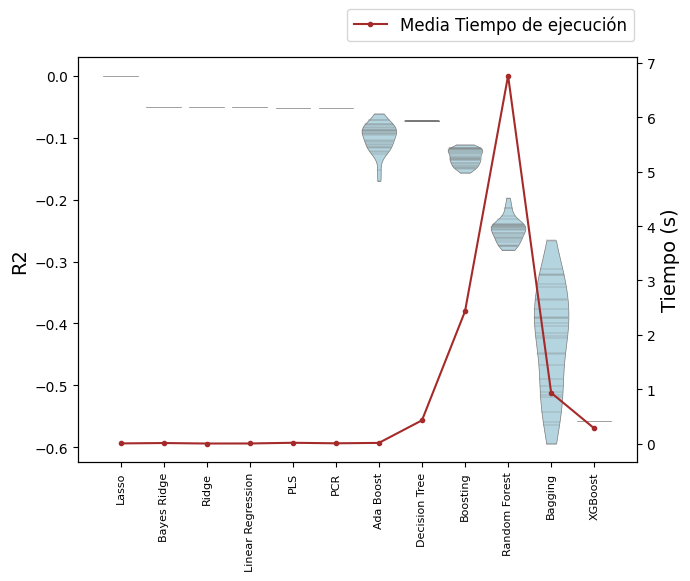

In [31]:
df_results_ed = df_results_ed.sort_values('r2', ascending=False)
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('r2', ascending=False)
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
ax = plt.gca()
sns.violinplot(x="model", y="r2", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('R2', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

### MAPE

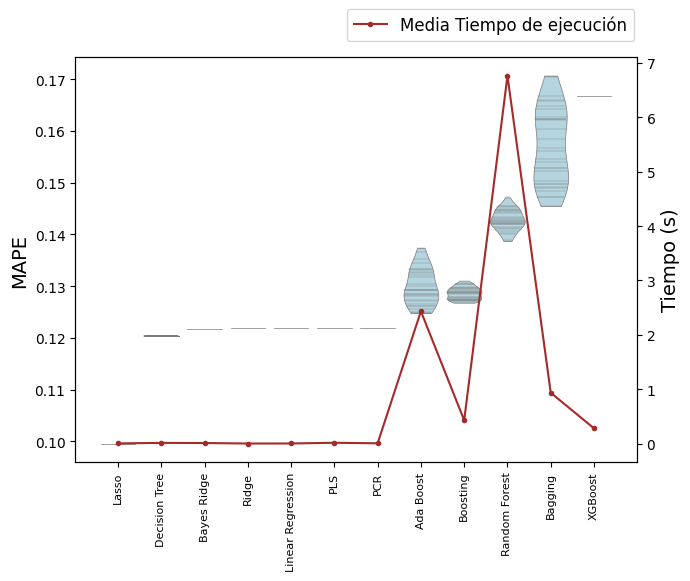

In [32]:
df_results_ed = df_results_ed.sort_values('mape')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mape')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
ax = plt.gca()
sns.violinplot(x="model", y="mape", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('MAPE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

## Método elegido: Lasso

### Evaluación de hyperámetros

In [89]:
split_data = [1, 2, 3, 4, 5]
alphas = [5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0]
bools = [True, False]
selections = ['cyclic', 'random']

results_ht = {
        'split_data' : [],
        'alpha' : [],
        'warm_start' : [],
        'selection' : [],
        'fit_intercept' : [],
        'score' : [],
        'mae' : [],
        'rmse' : [],
        'r2' : [],
        'mape' : [],
        'residuales' : [],
        'time' : []
    }

for k in tqdm(range(30)):
    for sd in split_data:
        inicio_train = 24
        if sd == 1:
            fin_train = 3156
            inicio_test =  3157
            fin_test = 6309
        elif sd == 2:
            fin_train = 6309
            inicio_test =  6310
            fin_test = 9462
        elif sd == 3:
            fin_train = 9462
            inicio_test =  9463
            fin_test = 12615
        elif sd == 4:
            fin_train = 12615
            inicio_test =  12616
            fin_test = 15768
        elif sd == 5:
            fin_train = 15768
            inicio_test =  15769
            fin_test = 18922

        y_train = y.loc[inicio_train:fin_train,]
        x_train = x.loc[inicio_train:fin_train,]

        y_test = y.loc[inicio_test:fin_test,]
        x_test = x.loc[inicio_test:fin_test,]

        for a in alphas:
            for ws in bools:
                for s in selections:
                    for fi in bools:
                        start = timer()
                        model = Lasso(alpha = a, warm_start=ws, selection=s, fit_intercept=fi)
                        model.fit(x_train, y_train)
                        y_pred = model.predict(x_test)
                        residual = (y_test["Generacion_diff"] - y_pred).to_numpy()
                        end = timer()
                        results_ht['split_data'].append(sd)
                        results_ht['alpha'].append(a)
                        results_ht['warm_start'].append(ws)
                        results_ht['selection'].append(s)
                        results_ht['fit_intercept'].append(fi)
                        results_ht['score'].append(model.score(x_test, y_test))
                        results_ht['mae'].append(mae(y_test, y_pred))
                        results_ht['rmse'].append(np.sqrt(mse(y_test, y_pred)))
                        results_ht['r2'].append(r2(y_test, y_pred))
                        results_ht['mape'].append(mape(y_test, y_pred))
                        results_ht['residuales'].append(residual)
                        results_ht['time'].append(end - start)

df_results_ht = pd.DataFrame(results_ht)
df_results_ht.to_csv('./Resultados_ht_articulo2.csv')


100%|██████████| 30/30 [21:10<00:00, 42.35s/it]


### Mejores hiperparámetros

In [118]:
df_results_ht["Metodo"] = 'split_data: ' + df_results_ht["split_data"].astype(str) + ' alpha: ' + df_results_ht['alpha'].astype(str) + ' warm_start: ' + df_results_ht['warm_start'].astype(str)	+ ' selection: ' + df_results_ht['selection'].astype(str) + ' fit_intercept: ' + df_results_ht['fit_intercept'].astype(str)


In [145]:
df_results2 = df_results_ht.copy()
df_results2 = df_results2.drop(columns = ['residuales'])
gf_results2 = df_results2.groupby(['split_data', 'alpha', 'warm_start', 'selection', 'fit_intercept'])['score'].mean().reset_index()
sort_scores_results = gf_results2.sort_values('score', ascending=False).reset_index()

In [147]:
hiperparametros = sort_scores_results.iloc[0:5]

### Aplicando los mejores hiperparámetros

In [182]:
max_value = datosGeneracion_dropna["Generacion_diff"].max()
min_value = datosGeneracion_dropna["Generacion_diff"].min()
residuales = pd.DataFrame()
for m in range(0, len(hiperparametros)):
    # Seleccionando el conjunto de datos
    inicio_train = 24
    if hiperparametros.loc[m, 'split_data'] == 0:
        fin_train = 3156
        inicio_test =  3157
        fin_test = 6309
    elif hiperparametros.loc[m, 'split_data'] == 1:
        fin_train = 6309
        inicio_test =  6310
        fin_test = 9462
    elif hiperparametros.loc[m, 'split_data'] == 2:
        fin_train = 9462
        inicio_test =  9463
        fin_test = 12615
    elif hiperparametros.loc[m, 'split_data'] == 3:
        fin_train = 12615
        inicio_test =  12616
        fin_test = 15768
    elif hiperparametros.loc[m, 'split_data'] == 4:
        fin_train = 15768
        inicio_test =  15769
        fin_test = 18921

    y_train = y.loc[inicio_train:fin_train,]
    x_train = x.loc[inicio_train:fin_train,]

    y_test = y.loc[inicio_test:fin_test,]
    x_test = x.loc[inicio_test:fin_test,]

    # Aplicamos el modelo
    model = Lasso(alpha = hiperparametros.loc[m, 'alpha'],
                  warm_start = hiperparametros.loc[m, 'warm_start'],
                  selection = hiperparametros.loc[m, 'selection'],
                  fit_intercept = hiperparametros.loc[m, 'fit_intercept'])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)


    # Regresamos todo a la normalidad
    df_y_pred = pd.DataFrame(y_pred, index = y_test.index, columns = ['Generacion_diff'])
    y_test2 = y_test.copy().reset_index(drop=True)
    df_y_pred2 = df_y_pred.copy().reset_index(drop=True)
    #Indicamos las filas que han sido predecidas por el método Bagging
    col_pred = 'predecida' + str(m+1)
    datosGeneracion[col_pred] = 0
    datosGeneracion.loc[df_y_pred.index, col_pred] = 1
    #Igualamos la predición con la generación
    col = 'prediccion_diff' + str(m+1)
    datosGeneracion[col] = datosGeneracion_scaled['Generacion_diff']
    datosGeneracion.loc[df_y_pred.index, col] = df_y_pred['Generacion_diff']
    col_scaled = 'Prediction' + str(m+1)
    datosGeneracion[col_scaled] = round((datosGeneracion[col] * (max_value - min_value)) + min_value, 2)
    col_final = 'Prediction_final' + str(m+1)
    datosGeneracion[col_final] = 0
    #Pasamos los primeros 24 registros de la generación original a las columnas predictivas
    datosGeneracion.loc[0:24, col_scaled] = datosGeneracion.loc[0:24, 'Generacion']
    datosGeneracion.loc[0:24, col_final] = datosGeneracion.loc[0:24, 'Generacion']
    #Desdiferenciamos topando mínimo con 0 y máximo con 30000
    for i in range(24, len(datosGeneracion)):
        datosGeneracion[col_final][i] = min(max(datosGeneracion[col_scaled][i] + datosGeneracion[col_final][i-24], 0), 30000)
    #Condicionamos a que haya valores si el Índice UV tiene valor
    col_uv = 'Prediction_UV' + str(m+1)
    datosGeneracion[col_uv] = datosGeneracion[col_final]
    datosGeneracion.loc[(datosGeneracion['IndiceUV'] == 0), col_uv] = 0
    col_res = 'Método ' + str(m+1)
    res = pd.DataFrame(np.array(datosGeneracion.loc[datosGeneracion[col_pred] == 1, 'Generacion_diff'] - datosGeneracion.loc[datosGeneracion[col_pred] == 1, col_uv]), columns = [col_res])
    residuales[col_res] = res[col_res]
      

In [194]:
datosGeneracion.loc[datosGeneracion['predecida1'] == 1, ['Prediction_UV1', 'Prediction_UV2']]

,Prediction_UV1,Prediction_UV2
9463,0.0,0.0
9464,0.0,0.0
9465,0.0,0.0
9466,0.0,0.0
9467,0.0,0.0
...,...,...
12611,0.0,0.0
12612,0.0,0.0
12613,0.0,0.0
12614,0.0,0.0


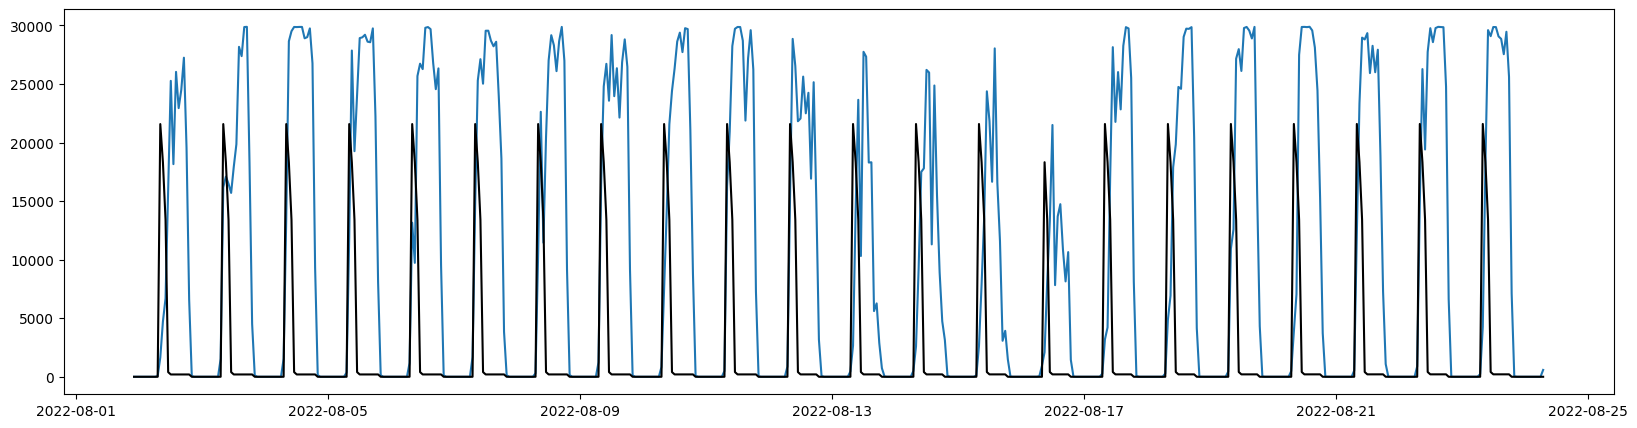

In [199]:
plt.figure(figsize=(20,5))
plt.plot(datosGeneracion.loc[9463:10000, "Fecha"], datosGeneracion.loc[9463:10000, "Generacion"])
plt.plot(datosGeneracion.loc[9463:10000, "Fecha"], datosGeneracion.loc[9463:10000, "Prediction_UV2"], c = 'black')


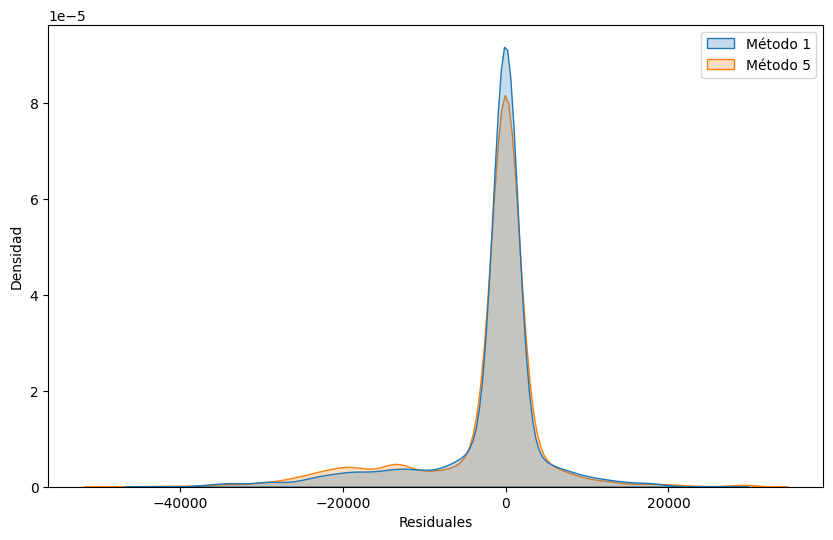

In [193]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=residuales.loc[:,['Método 1', 'Método 5']], fill=True)
plt.xlabel('Residuales')
plt.ylabel('Densidad')
plt.show()